In [82]:
import numpy as np
import seaborn as sns
from IPython.display import display
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## Data 準備

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# 分布の描画

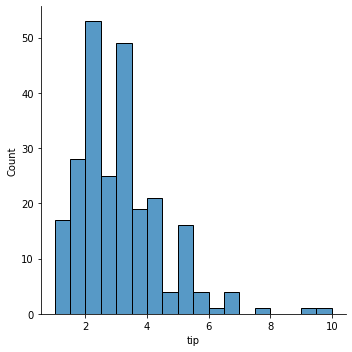

In [3]:
sns.displot(df['tip'], kde=False)

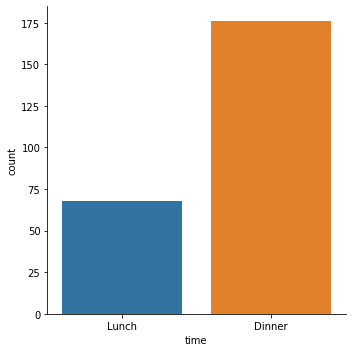

In [4]:
sns.catplot(x='time', data=df, kind='count')

## 平均値

In [5]:
np.mean(df['tip_rate'])

0.16080258172250472

In [6]:
df['tip_rate'].mean()

0.16080258172250472

In [7]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

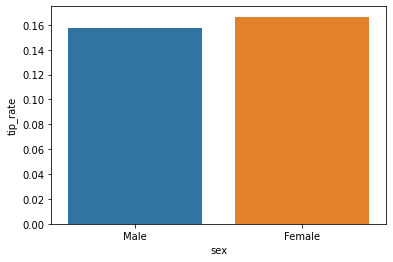

In [8]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

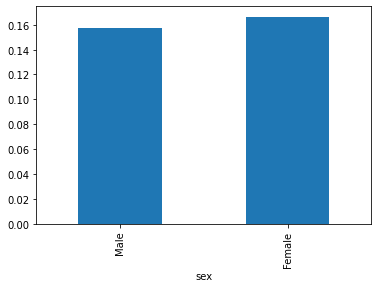

In [9]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [10]:
np.median(df['tip_rate'])

0.15476977125802577

In [11]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

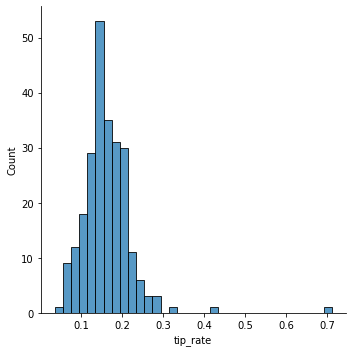

In [12]:
sns.displot(df['tip_rate'], kde=False)

In [13]:
df['tip_rate'].median()

0.15476977125802577

In [14]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

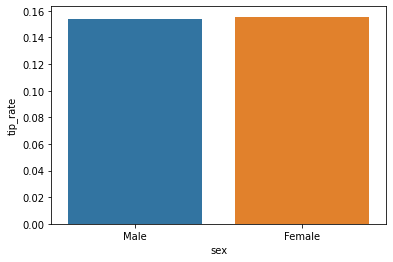

In [15]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [16]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値（mode）

In [17]:
mode, count = stats.mode(df)

In [18]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [19]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [20]:
mode, count = stats.mode(df['size'])
print(mode, count)

[2] [156]


## 範囲（range）

In [21]:
np.max(df['tip'])

10.0

In [22]:
df['tip'].max()

10.0

In [23]:
df.groupby('sex').max()

/tmp/ipykernel_15742/3670670510.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('sex').max()


,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [24]:
df['tip'].max() - df['tip'].min()

9.0

## 四分位数

In [25]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [26]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [27]:
# IQR（四分位範囲）
stats.iqr(df['tip_rate'])

0.06234812458689151

In [28]:
0.191475 - 0.129127

0.062348000000000015

In [29]:
# QD（四分位偏差）
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

### 箱ひげ図

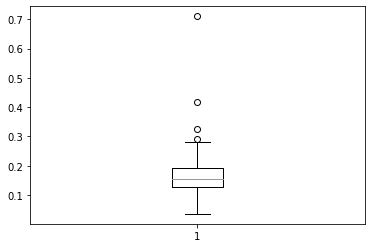

In [30]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

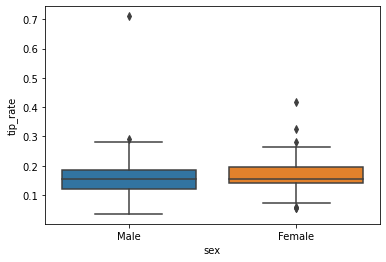

In [31]:
sns.boxplot(x='sex', y='tip_rate', data=df)

In [32]:
np.var(df['tip'])

1.9066085124966412

In [33]:
np.std(df['tip'])

1.3807999538298954

In [34]:
np.sqrt(np.var(df['tip']))

1.3807999538298954

In [35]:
tip_mean = df['tip'].mean()
tip_mean

2.99827868852459

In [36]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 共分散

In [37]:
display(np.cov(df['total_bill'], df['tip'], bias=True))

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [38]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
display(np.cov(x, bias=True))

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [39]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数

In [40]:
display(np.corrcoef([1, 4, 5], [5, 6, 8]))

array([[1.        , 0.89104211],
       [0.89104211, 1.        ]])

In [41]:
display(np.corrcoef(df['total_bill'], df['tip']))

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [42]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
display(np.corrcoef(x))

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [43]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

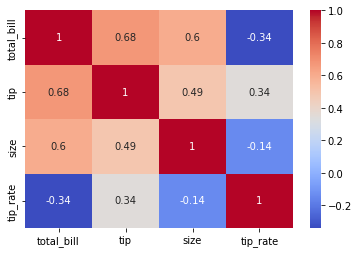

In [44]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関

In [45]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [46]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [47]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2 / (min_d * n))
    return v

In [48]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 確率分布

In [49]:
# random variates(rvs): 確率変量
stats.randint(1, 7).mean()

3.5

In [50]:
stats.uniform(0, 1).rvs()

0.7038699994844451

## 確立分布の描画

In [69]:
def simple_func(x):
    return x ** 2 + 3

In [70]:
simple_func(10)

103

In [73]:
# x = np.linspace(-3, 3, 100)
x = np.arange(-3, 4)
y = simple_func(x)


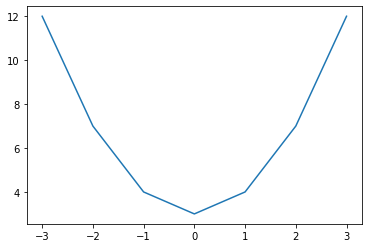

In [74]:
plt.plot(x, y)

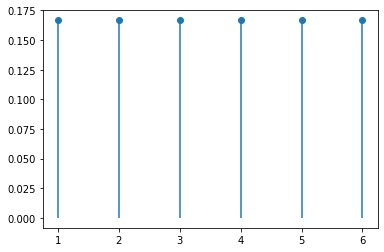

In [99]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

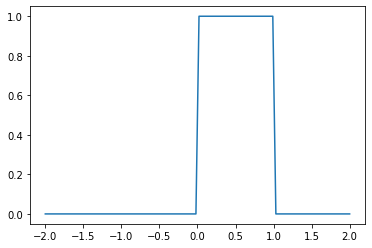

In [103]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)